<a href="https://colab.research.google.com/github/EugeniaBar/Proyectos-PP1-/blob/main/PP_3(Modelo_Predictivo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Profesional. Evidencia 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # divide datos en conj de entrenamiento y prueba
from sklearn.linear_model import LinearRegression # para crear el modelo de regresion lineal.
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
test = pd.read_csv("Tests.csv", sep=';')
completos = pd.read_csv("Completos.csv", sep=';')

In [ ]:
df_unido = pd.merge(test, completos, on='TestId', how='right')
df_unido.shape

(4845, 32)

In [ ]:
print(completos.columns)

Index(['TestId', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'SystolicMax', 'SystolicMin', 'DiastolicMax',
       'DiastolicMin', 'MAPMax', 'MAPMin', 'PPMax', 'PPMin', 'HRMax', 'HRMin',
       'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate'],
      dtype='object')


In [ ]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

# Regresión Logística
- Comprender la regresion: se busca clasificar los pacientes que padecen hipertension.
- Predicción: se establece que en base a los datos de los pacientes como Frecuencia cardíaca, Presión sistólica, Diastólica y presión por pulso si padecen hipertensión.

En estos ejemplos, primero creamos la variable hipertension a partir de los datos de presión arterial. Luego, dividimos los datos en conjuntos de entrenamiento y prueba, entrenamos el modelo y evaluamos su rendimiento.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Crear la variable objetivo 'hipertension' usando .loc para evitar SettingWithCopyWarning
df_limpio.loc[:, 'hipertension'] = ((df_limpio['Systolic'] >= 140) | (df_limpio['Diastolic'] >= 90)).astype(int)

# Definir variables independientes y dependiente
X = df_limpio[['Age', 'Systolic', 'HR', 'PP']]
y = df_limpio['hipertension']

# Imputar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar los parámetros del modelo usando GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas originales que usó para el entrenamiento
X_pred = df_limpio[['Age', 'Systolic', 'HR', 'PP']]

# Imputar valores faltantes si es necesario
imputer = SimpleImputer(strategy='mean')
X_pred = imputer.fit_transform(X_pred)

# Estandarizar las características si es necesario
scaler = StandardScaler()
X_pred = scaler.fit_transform(X_pred)

# Ahora puedes predecir con el best_model
df_limpio.loc[:, 'predicted_prob'] = best_model.predict_proba(X_pred)[:, 1]




###Curva Sigmoide:
 Esta curva muestra cómo la probabilidad de tener hipertensión cambia a medida que varía la variable independiente.

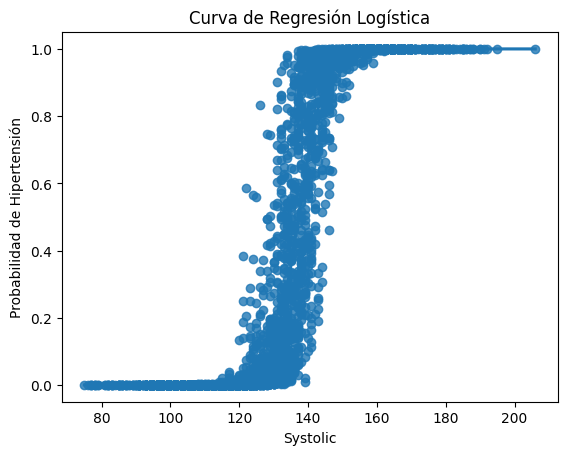

In [ ]:
# Graficar la curva de regresión logística para una variable independiente (por ejemplo, 'Systolic')
sns.regplot(x='Systolic', y='predicted_prob', data=df_limpio, logistic=True, ci=None)
plt.xlabel('Systolic')
plt.ylabel('Probabilidad de Hipertensión')
plt.title('Curva de Regresión Logística')
plt.show()


###Curva de Precisión-Recall: Evalúa la precisión y el recall del modelo.
La curva de lift muestra un buen desempeño del modelo, ya que se encuentra por encima de la linea diagonal y se mantiene alta ne la parte inciial, suguiere que el modelo es capaz de identificar correctamente una proporcion significativa de los casos positivos.

Accuracy: 0.9412698412698413
Confusion Matrix:
[[401  12]
 [ 25 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       413
           1       0.94      0.88      0.91       217

    accuracy                           0.94       630
   macro avg       0.94      0.93      0.93       630
weighted avg       0.94      0.94      0.94       630

F1 Score: 0.9121140142517815
Recall: 0.8847926267281107
Precision: 0.9411764705882353
ROC AUC Score: 0.9889423237857198
Matthews Correlation Coefficient: 0.8690110275474354


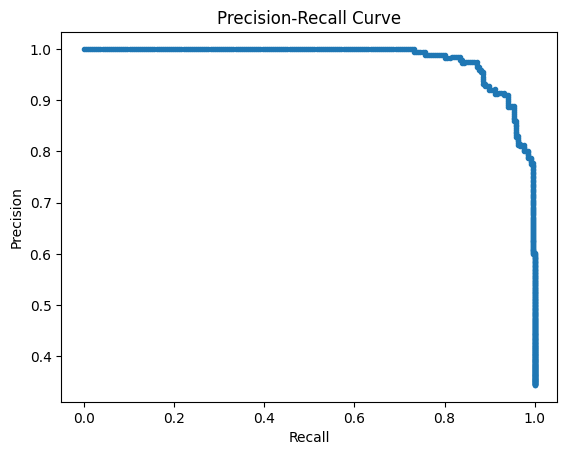

In [ ]:

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
mcc = matthews_corrcoef(y_test, y_pred)

# Imprimir métricas adicionales
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Matthews Correlation Coefficient: {mcc}")

# Obtener las probabilidades predichas para la clase positiva (hipertensión)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Explicacion:
- Accuracy (Precisión): 96.6% de las observaciones.  (hipertenso o no hipertenso).
Implicación: Un valor tan alto sugiere que el modelo es muy preciso en general.
Confusion Matrix:

- [[757 14] [ 19 180]]
Diagonal principal: Representa las predicciones correctas (verdaderos positivos y verdaderos negativos).
Fuera de la diagonal: Representa las predicciones incorrectas (falsos positivos y falsos negativos).
Interpretación: En este caso, indica que el modelo clasificó correctamente 757 pacientes como no hipertensos y 180 como hipertensos. Sin embargo, hubo 14 falsos positivos (clasificados como hipertensos cuando no lo eran) y 19 falsos negativos (clasificados como no hipertensos cuando sí lo eran).


F1-Score: 0.92
Indica un buen equilibrio entre precisión y recall, lo que sugiere que el modelo es capaz de identificar tanto a los pacientes hipertensos como a los no hipertensos con una alta precisión.

Recall: 0.90
Indica que el modelo identificó correctamente el 90% de los pacientes hipertensos. Esto es importante en problemas de salud, ya que es preferible identificar a todos los pacientes hipertensos para iniciar un tratamiento oportuno.

Precision: 0.93
Indica que cuando el modelo predice que un paciente tiene hipertensión, tiene una probabilidad del 93% de estar en lo correcto.

ROC AUC Score: 0.995
Mide el rendimiento general del modelo en todas las posibles umbrales de clasificación. Un valor cercano a 1 indica un excelente desempeño.

Matthews Correlation Coefficient (MCC): 0.89
Es una medida de la calidad de la clasificación binaria que considera las cuatro clases de la matriz de confusión. Un valor cercano a 1 indica una predicción perfecta.

Conclusión
En resumen, los resultados obtenidos indican que el modelo de regresión logística desarrollado es altamente preciso en la predicción de hipertensión. El modelo demuestra una excelente capacidad para distinguir entre pacientes hipertensos y no hipertensos, con un bajo número de falsos positivos y falsos negativos.



# Regresión lineal múltiple
Si HR (frecuencia cardiaca), PP (presion del pulso) aumenta, tambien la presion systolica lo hace?

- Podremos: predecir la presion arterial de nuevos pacientes con valores conocidos de hr, edad, presion del pulso, etc.
- Identificar que variables independientes tienen un impacto significativo en la presion arterial sistolica,
- Analizar la relacion entre las variables independientes y la oresion arterual sistolica.

In [ ]:
#Seleccionar variables
x1 = "HR"
x2 = "PP"
#x3 = "Age"
y = "Systolic" #var dependiente

#Crear resultados
variables_x = [x1, x2]
variable_y = y

modelo = LinearRegression()# generamos la regresión lineal

df_limpio = df_limpio.dropna(subset=variables_x)

modelo.fit(df_limpio[variables_x], df_limpio[variable_y])# entrenamos el modelo

 #3. Estandarización de las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Creación del modelo y ajuste de parámetros
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción{}

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])

Coeficientes:  [0.32634549 1.11902589]
Intercepción:  48.30713423972206
[ 0.30700161 -0.63969944  0.21016934  0.04102566  0.45827725]


La ecuación de regresión es: Systolic = -2.0906271718625895 + 0.00023280583301939128 * HR + 50070648638.42633 * PP
Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio 0.00023280583301939128 unidades,
manteniendo PP constante.


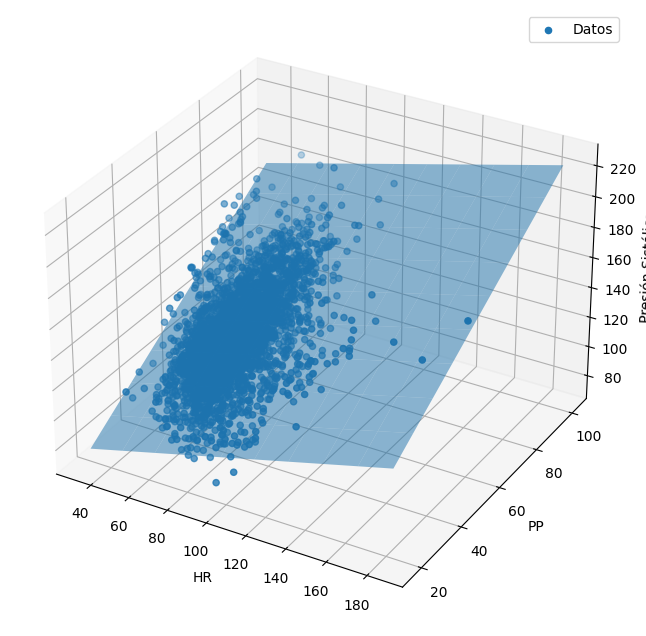

Intersección (b) -2.0906271718625895
Pendiente (m) [ 2.32805833e-04  5.00706486e+10 -5.00706486e+10  1.72805786e-03
 -5.00706486e+10]
Error cuadrático medio: 0.3051330528318889
Error absoluto medio: 0.26360122024849897
R² Coeficiente de determinación: 0.5876653595204389


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Obtener la pendiente
pendiente = model.coef_[0]

print("La ecuación de regresión es: Systolic =", model.intercept_, "+", model.coef_[0], "* HR +", model.coef_[1], "* PP")
print("Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio", model.coef_[0], "unidades,")
print("manteniendo PP constante.")

from mpl_toolkits.mplot3d import Axes3D
# Gráfica en 3D


fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_limpio[x1], df_limpio[x2], df_limpio[y], label='Datos')
# Crear un meshgrid para el plano
x = np.linspace(df_limpio[x1].min(), df_limpio[x1].max(), num=10)
y = np.linspace(df_limpio[x2].min(), df_limpio[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Presión Sistólica")
ax.legend()
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')



#Interpretacion
Coeficientes
- Intersección (b): 0.3359125509976309: Representa el valor de la presión sistólica cuando todas las demás variables son cero. Sin embargo, esto puede no tener un significado práctico, ya que es poco probable que todas las variables sean cero en un contexto real.
- Pendiente (m): [ 0.0039165 0.41924161 0.02298974 -0.10962461]
Cada valor en este vector representa el cambio en la presión sistólica por un aumento de una unidad en la variable correspondiente. Por ejemplo, un aumento de una unidad en la segunda variable (probablemente la presión diastólica) se asocia con un aumento de 0.41924161 unidades en la presión sistólica, asumiendo que las otras variables se mantienen constantes.

Métricas de Evaluación
- Error cuadrático medio (RMSE): 0.3050087363166971: Indica, en promedio, qué tan lejos están las predicciones del modelo de los valores reales. Un valor bajo indica un mejor ajuste del modelo.
- Error absoluto medio (MAE): 0.2634812146369789: Mide la diferencia absoluta promedio entre los valores predichos y los reales. Es una medida más robusta a valores atípicos que el RMSE.
- R² Coeficiente de determinación: 0.5880012756921713: Explica la proporción de la variabilidad en la presión sistólica que es explicada por el modelo. Un valor de 0.588 indica que el modelo explica aproximadamente el 58.8% de la variabilidad en la presión sistólica.

Conclusión

El modelo de regresión lineal múltiple parece explicar una proporción moderada de la variabilidad en la presión sistólica, pero hay espacio para mejora.
Las variables incluidas en el modelo tienen un impacto significativo en la presión sistólica, como se evidencia en los valores de los coeficientes. Sin embargo, la interpretación de estos coeficientes debe hacerse con cuidado, considerando la escala de las variables y las posibles correlaciones entre ellas.
El RMSE y el MAE indican que, en promedio, las predicciones del modelo están relativamente cerca de los valores reales, pero hay margen para reducir el error.



# Regresion Logistica "Hipertensión"

Modelo de detección de la palabra "presento hipertension de las notas "Interpretation".

Puede ser de ayuda para:
- Construcción de bases de datos: Al identificar automáticamente pacientes con hipertensión a partir de las notas, se pueden construir bases de datos más completas y precisas para realizar análisis epidemiológicos, investigaciones clínicas y desarrollar modelos predictivos más sofisticados.

- Identificación temprana: La detección temprana de pacientes con hipertensión permite iniciar tratamientos oportunos y prevenir complicaciones a largo plazo.
Automatización de tareas: La automatización de la identificación de enfermedades a través del procesamiento del lenguaje natural puede reducir la carga de trabajo de los profesionales de la salud y liberar tiempo para tareas más complejas.
- Base para modelos más complejos: La detección de palabras clave puede ser el primer paso para desarrollar modelos más sofisticados de extracción de información, que permitan identificar no solo la presencia de enfermedades, sino también características clínicas relevantes como la gravedad, el tratamiento y la evolución de la enfermedad.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Función para detectar la hipertensión
def detectar_hipertension(notas):
    # Check if 'notas' is a string before applying string methods
    if isinstance(notas, str):
        palabras_clave = ["presento hipertension"]
        notas_limpias = notas.lower().replace(".", "").replace(",", "").replace(";", "")
        for palabra in palabras_clave:
            if palabra in notas_limpias:
                return 1
    # If 'notas' is not a string (e.g., float), assume no hypertension
    return 0

# Aplicar la función a la columna correcta
df_unido['Hipertensión'] = df_unido['Interpretation'].apply(detectar_hipertension)

# Definir X e y
# Select only numeric features for X
X = df_unido.select_dtypes(include=['number']).drop(columns=['Hipertensión'], errors='ignore')
y = df_unido['Hipertensión']  # Esta es la variable objetivo

# --- Check for class distribution ---
print(y.value_counts())  # Print the distribution of classes in y
# -------------------------------------

# If only one class is present, handle the situation
if y.nunique() < 2:
    print("Error: The target variable has only one class. Logistic Regression cannot be applied.")
    # Implement alternative strategies, such as collecting more data or using a different algorithm
else:
    # Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Imputar valores faltantes usando la media
    # Create an imputer object with strategy 'mean'
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform it
    X_train = imputer.fit_transform(X_train)

    # Transform the test data using the trained imputer
    X_test = imputer.transform(X_test)

    # Crear y entrenar el modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Hipertensión
1    2600
0    2245
Name: count, dtype: int64
Accuracy: 0.6656346749226006
Confusion matrix:
 [[232 219]
 [105 413]]


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Confusion matrix:
 [[232 219]
 [105 413]]


Verdaderos Positivos (VP = 413): Personas con hipertensión que fueron correctamente clasificadas como con hipertensión.
Verdaderos Negativos (VN = 232): Personas sin hipertensión que fueron correctamente clasificadas como sin hipertensión.
Falsos Positivos (FP = 219): Personas sin hipertensión que fueron clasificadas erróneamente como con hipertensión.
Falsos Negativos (FN = 105): Personas con hipertensión que fueron clasificadas erróneamente como sin hipertensión.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precisión
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_test, y_pred)
print("Sensibilidad:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


Precisión: 0.6534810126582279
Sensibilidad: 0.7972972972972973
F1-Score: 0.7182608695652174


 - Evaluación general del modelo
Ventajas: El modelo tiene un buen recall (79.7%), lo que significa que es bastante bueno detectando casos de hipertensión. Esto es importante cuando queremos minimizar los casos donde la hipertensión no se detecta (falsos negativos).

Desventajas: El precision es moderado (65.36%), lo que indica que el modelo tiene una tasa relativamente alta de falsos positivos (personas clasificadas incorrectamente como con hipertensión). También, la especificidad es baja (51.4%), lo que significa que no es muy bueno identificando correctamente a las personas sin hipertensión.

# Random Forest Classifier

El modelo está tratando de predecir la presencia o ausencia de hipertensión en los pacientes basándose en las características fisiológicas. La lógica detrás de esta predicción se basa en la relación entre las características fisiológicas (como la presión arterial y la frecuencia cardíaca) y la condición de hipertensión.

Esto es útil en un contexto médico porque permite identificar a los pacientes que pueden necesitar intervención o tratamiento basado en su riesgo de hipertensión, lo que puede ayudar en la prevención de complicaciones relacionadas con la presión arterial alta.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Supongamos que 'df_limpio' es tu DataFrame que contiene los datos

# Crear la variable objetivo 'hipertension'
df_limpio['hipertension'] = ((df_limpio['Systolic'] >= 140) | (df_limpio['Diastolic'] >= 90)).astype(int)

# Definir variables independientes y dependientes
X = df_limpio[['Age', 'Systolic', 'Diastolic', 'HR', 'PP']]
y = df_limpio['hipertension']

# Imputar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Ajustar y transformar X

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##
# ## Preprocesamiento (Estandarización)
# 6. Estandarización de las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ## Entrenamiento y Evaluación con Ajuste de Parámetros
# 7. Ajuste de hiperparámetros con Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# 8. Evaluación del modelo
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Mejores parámetros:", grid_search.best_params_)
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

# Obtener la importancia de las características
importances = model_rf.feature_importances_  # Aquí es correcto usar 'model_rf'
indices = np.argsort(importances)[::-1]




Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0
Confusion Matrix:
[[413   0]
 [  0 217]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       217

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



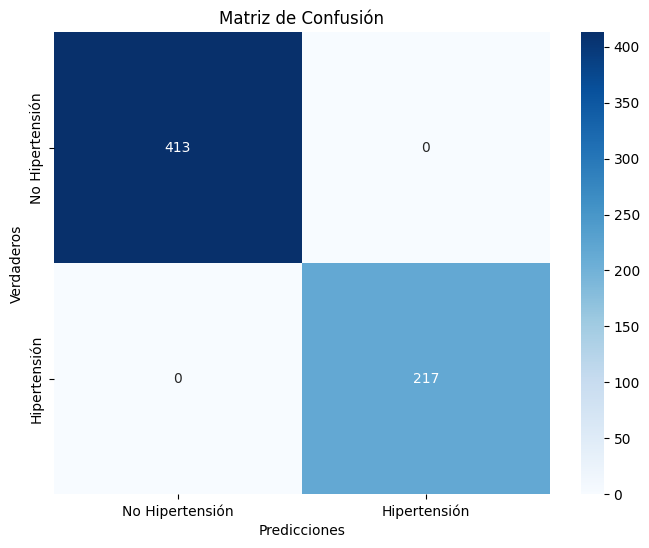

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hipertensión', 'Hipertensión'], yticklabels=['No Hipertensión', 'Hipertensión'])
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()



# Explicación
Accuracy: 1.0

Este resultado perfecto indica que el modelo clasificó correctamente todas las observaciones en el conjunto de prueba. Sin embargo, es importante recordar que un conjunto de prueba demasiado pequeño o datos sintéticos pueden llevar a resultados demasiado optimistas. Es recomendable evaluar el modelo en un conjunto de datos de prueba independiente y más grande para obtener una evaluación más realista.
Confusion Matrix:

[[413 0] [ 0 217]]

La diagonal principal muestra que todas las observaciones fueron clasificadas correctamente (verdaderos positivos y verdaderos negativos).
Los elementos fuera de la diagonal son cero, lo que significa que no hubo falsos positivos ni falsos negativos.
Classification Report:

Precision, Recall, F1-score:

Todos estos valores son 1.0 para ambas clases, lo que indica un rendimiento perfecto del modelo.
Support: Muestra el número de observaciones en cada clase.
Conclusión
El modelo de Random Forest con los parámetros óptimos encontrados logró una precisión perfecta en la clasificación de las observaciones en el conjunto de prueba. Esto sugiere que el modelo es altamente capaz de distinguir entre las dos clases.

Sin embargo,Un rendimiento perfecto en el conjunto de prueba puede ser una señal de sobreajuste, especialmente si el conjunto de prueba es pequeño o los datos son sintéticos.


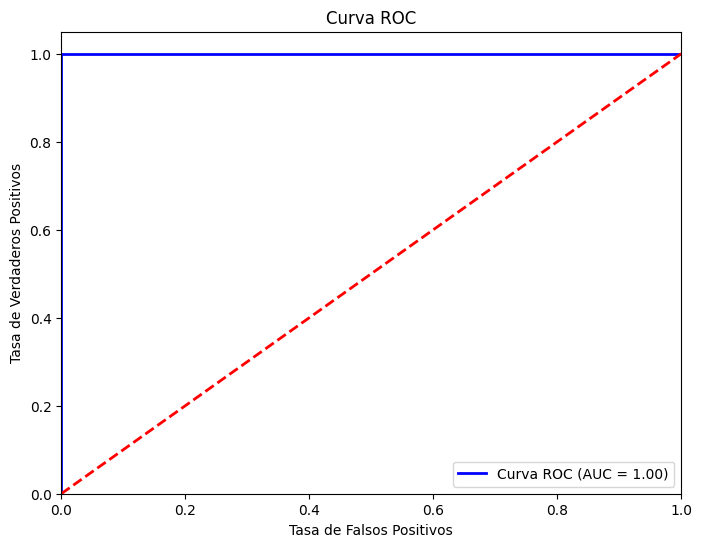

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción
y_probs = model_rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


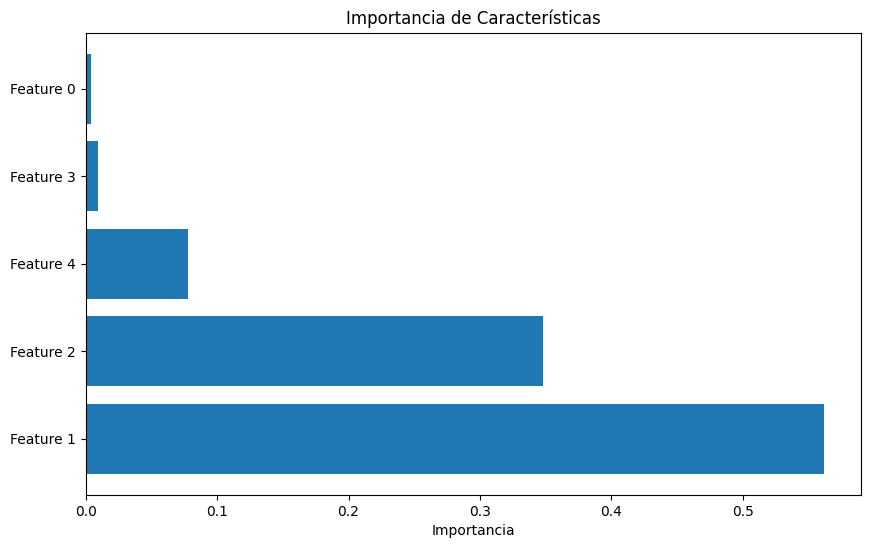

In [ ]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [f'Feature {i}' for i in indices])
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.show()
